## Importância prática do conteúdo.						


Os hiperparâmetros são as variáveis do algoritmo que controlam todo o seu comportamento. Isso afeta sua velocidade, resolução, estrutura e, eventualmente, desempenho.  
Com conjuntos de dados muito grande os testes desses valores de hiperparâmetros pode se tornar  muito exaustivo por levar muito para executar o modelo, uma alternativa para evitar essa exaustão é a otimização de hiperparâmetros.  
A otimização de hiperparâmetros pode nos ajudar a poupar tempo e chegar no melhor desempenho possível para modelos de aprendizado, pesquisando assim os melhoreres hiperparâmetros que melhorem o desempenho do modelo de aprendizado.  


* Existem três métodos principais para realizar a pesquisa de hiperparâmetros:  

    * Pesquisa em grade

    * Pesquisa aleatória

    * Pesquisa Bayesiana

Nosso objetivo será detalhar a Pesquisa Bayesiana para otimização.  
A Otimização bayesiana tem um destaque das demais otimizações, A seguir veremos um exemplo dos hiperparâmetros testados em uma pesquisa em grade e em uma pesquisa aleátoria.  
**Grid Search**

* Na busca em grade podemos vermos que os parâmetros a serem testados tem de ser especificados, e assim o modelo testará cada uma das especificações, no caso dos parâmetros testados abaixo teremos somente 262 casos pois os numeros de parâmetros testados são:
$$ 3*3*3*3*2 = 162 $$


~~~python
param_grid = {  
    'max_depth': [3, 5, 7],  
    'min_samples_leaf': [10, 50, 100],  
    'min_samples_split': [30, 150, 300],  
    'n_estimators': [10, 30, 50],  
    'max_features': ['sqrt', 'log2']  
}  
~~~
**Randomized Search**

* Na busca aléatoria os parâmetros apenas parte dos valores dos parâmetros são experimentados. Os valores de parâmetro são amostrados de uma determinada lista ou distribuição especificada[¹](https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399).
Assim, a busca é feito de forma de forma aleátoria testando os valores de forma randomica.

~~~python
param_randon = {
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': np.arange(10, 101),
    'min_samples_split': np.arange(30, 301),
    'n_estimators': np.arange(10, 51),
    'max_features': ['sqrt', 'log2']
}
~~~

* Essas Duas abordagens são executadas de forma que não há conexão entre uma execução e as demais, essas execuções são independes, ou seja, essas abordagens não possui aprendizado entre cada execução de testagem de parâmetros.   
Uma abordagem que supere essas problematicas é a abordagem de busca bayesiana.   
Uma abordagem que pode observar que nosso modelo está sendo otimizado perto de certos valores de hiperparâmetros e pode explorar essas informações valiosas e prosseguir para os hiperparâmetros mais próximos dos de bom desempenho, **aprendendo assim com seu histórico**. Ao fazer isso, o algoritmo não perderia tempo com hiperparâmetros de baixo desempenho enquanto alcançava os hiperparâmetros de melhor desempenho.   
Assim, esta otimização busca aprender com suas iterações passadas buscando assim os melhores valores para cada parãmetro.   



## Conceitos e Definições dos Componentes Matemático Matematicos.						


### Otimização Bayesiana
A otimização Bayesiana se baseia na equação de probabilidade de Bayes, ela busca achar os melhores hiperparametros dada uma melhoria na pontuação de score.   
Abaixo segue as equações matemáticas que descrevem essa busca:

 
*  Equação de probabilidade de Bayes:  
$$ P(A | B) = \frac{P(B | A) * P(A)}{P(B)} $$

*  Equação de probabilidade de Otimização Bayesiana:  
$$ P(Hyperparams | Score) = \frac{P(Score | Hyperparams) * P(Hyperparams)}{p(Score)} $$

Onde:  
* $ P(Hyperparams | Score) $ : Probabilidade dos hiperparametros dado os scores.  
* $ P(Score | Hyperparams) $ : Probabilidade do score dado os hiperparametros.     
* $ P(Hyperparams) $ :Probabilidade dos hiperparametros.  
* $ P(Score) $ :Probabilidade dos Score.



Esta otimização é divida em duas etapas :


### Modelo Substituto
* Ajuste um modelo probabilístico substituto aos dados iniciais. Este modelo aproxima a função objetivo e fornece estimativas do valor da função e da incerteza para qualquer conjunto dado de hiperparâmetros.


### Função de Aquisição
* Use uma função de aquisição para determinar os próximos hiperparâmetros a serem avaliados. A função de aquisição equilibra exploração (amostrando pontos onde o modelo substituto é incerto ou espera melhorias) e exploração (amostrando pontos que provavelmente serão ótimos com base no modelo substituto).  
A Expected Improvement (EI) é a função de aquisição mais comumente utilizada. Ela tenta prever a melhoria esperada em relação ao melhor valor atual de uma função objetivo (a perda ou score que você está tentando minimizar ou maximizar).

### Expected Improvement (EI)

* A fórmula para o **Expected Improvement** é dada por:

$$
EI(x) = \int_{-\infty}^{y^*} (y^* - y) p(y | x) dy
$$

Onde:
- $EI(x)$ é a melhoria esperada para o conjunto de hiperparâmetros $x$.
- $y^*$ é o melhor *score* ou valor de perda observado até o momento.
- $y = f(x)$ é o *score* obtido da função objetivo para o conjunto de hiperparâmetros $x$.
- $p(y | x)$ é a distribuição de probabilidade dada pelo modelo substituto para obter um *score* $y$ no conjunto $x$.

**Interpretação**:

Se a função $y$ diminui (ou seja, a perda diminui ou o score aumenta), o valor de $EI$ será positivo, o que indica que há boas chances de que o novo conjunto de hiperparâmetros seja melhor do que o melhor conhecido até o momento.

Em resumo, o Expected Improvement ajuda a selecionar o próximo conjunto de hiperparâmetros testando combinações que têm maior probabilidade de melhorar o resultado atual. Isso é feito com base no modelo substituto e em todas as tentativas anteriores de hiperparâmetros.




## Expected Improvement (EI) – Otimização Bayesiana

### Equação Geral do Expected Improvement (EI)

A fórmula inicial do **Expected Improvement (EI)** é dada por:

$$
EI(x) = \int_{-\infty}^{y^*} (y^* - y) p(y | x) \, dy
$$

Essa equação calcula a melhoria esperada em relação ao melhor valor observado até o momento, $y^*$. O termo $p(y | x)$ é a probabilidade de obter o valor $y$ dada uma configuração $x$ dos hiperparâmetros.

### Desenvolvimento da Equação 4.2.6

A equação 4.2.6 reescreve o EI utilizando a regra de Bayes:

$$
EI_{y^*}(x) = \int_{-\infty}^{y^*} (y^* - y) p(y | x) \, dy = \int_{-\infty}^{y^*} (y^* - y) \frac{p(x | y) \cdot p(y)}{p(x)} \, dy
$$

Usamos a regra de Bayes para expressar $p(y | x)$ como $\frac{p(x | y) \cdot p(y)}{p(x)}$, o que permite separar a contribuição de $p(x | y)$ e $p(y)$ na integral.

### Denominador (Equação 4.2.7)

A equação para o denominador $p(x)$ pode ser reescrita utilizando as equações anteriores como:

$$
p(x) = \int_{\mathbb{R}} p(x | y) \cdot p(y) \, dy = \gamma \cdot l(x) + (1 - \gamma) \cdot g(x)
$$

Aqui:
- $l(x)$: modela os bons resultados, ou seja, os valores de $y$ menores que $y^*$.
- $g(x)$: modela os maus resultados, ou seja, os valores de $y$ maiores que $y^*$.
- $\gamma$: é a proporção de amostras que têm $y \leq y^*$.

### Numerador (Equação 4.2.8)

Agora, vamos simplificar o numerador da integral $\int_{-\infty}^{y^*} (y^* - y) p(x | y) \cdot p(y) \, dy$:

$$
\int_{-\infty}^{y^*} (y^* - y) p(x | y) \cdot p(y) \, dy = l(x) \int_{-\infty}^{y^*} (y^* - y) p(y) \, dy
$$

A integral à direita envolve a função de distribuição $p(y)$ e a diferença $(y^* - y)$, que representa a expectativa ponderada dos bons resultados.

### Equação Final do Expected Improvement (EI)

Agora, juntando o numerador e o denominador, obtemos a fórmula completa do **Expected Improvement**:

$$
EI_{y^*}(x) = \frac{\gamma \cdot y^* \cdot l(x) - l(x) \int_{-\infty}^{y^*} p(y) \, dy}{\gamma \cdot l(x) + (1 - \gamma) \cdot g(x)}
$$

Essa equação expressa o **Expected Improvement** em termos das distribuições $l(x)$ e $g(x)$, que modelam os bons e maus resultados, respectivamente.

### Simplificação Final (Equação 4.2.9)

Ao simplificar ainda mais, obtemos a forma compacta da função **EI**:

$$
EI_{y^*}(x) \propto \left[ \gamma + \frac{g(x)}{l(x)} (1 - \gamma) \right]^{-1}
$$

Essa forma compacta relaciona a razão entre $g(x)$ e $l(x)$ com a probabilidade $\gamma$.

## Interpretação da Função Expected Improvement (EI)

A função **Expected Improvement (EI)** mede o ganho esperado ao explorar um novo ponto $x$ no espaço dos hiperparâmetros. O **EI** é maximizado em regiões onde existe um equilíbrio entre **exploração** (testar novos pontos com alta incerteza) e **exploração** (refinar pontos próximos ao valor ótimo atual $y^*$).

A função $l(x)$ modela as probabilidades de obter bons resultados, enquanto $g(x)$ modela as probabilidades de obter maus resultados. O parâmetro $\gamma$ controla a proporção de bons resultados amostrados até agora.

Em resumo, a otimização do **Expected Improvement** permite à otimização bayesiana sugerir os próximos valores de hiperparâmetros a serem testados, maximizando a chance de melhoria em relação ao melhor resultado encontrado até o momento.


## Exemplo de Aplicação da Otimização Bayesiana

Está otimização pode ser aplicada para melhorar modelos preditivos em series temporais, usaremos como exemplo a Série Histórica de Preços de Combustíveis e de GLP da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis - ANP, usaremos a otimização bayesiana para melhorar as predições do modelo de Regressão Linear.  

## Aplicação em Series Temporais.						

Agora iremos fazer uma aplicação da Otimização no modelo de regressão linear para dados em series temporais.  

## Leitura de arquivo

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [27]:
dados = pd.read_csv("data/ca.csv")

C:\Users\kaio\AppData\Local\Temp\ipykernel_10700\2499396848.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv("data/ca.csv")


In [28]:

# Mostra o nome das colunas
print("Nomes das colunas:")
print(dados.columns)

Nomes das colunas:
Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')


In [29]:
# Verificando quais colunas contêm valores nulos
colunas_nulas = dados.isnull().sum()

# Filtrando para mostrar apenas as colunas que têm valores nulos
colunas_com_nulos = colunas_nulas[colunas_nulas > 0]

print("Colunas com valores nulos:")
print(colunas_com_nulos)

Colunas com valores nulos:
Numero Rua            605
Complemento        579320
Bairro               1176
Valor de Compra    740945
dtype: int64


In [30]:
dados['Estado - Sigla'].value_counts()

Estado - Sigla
BA    240700
CE    159862
PE    132842
MA     77758
RN     54326
PB     52367
PI     51767
AL     47837
SE     34418
Name: count, dtype: int64

## Pre-Processamento

In [31]:
print("tamanho dos dados antes do pre-processamento:",len(dados))
dados.head(5)


tamanho dos dados antes do pre-processamento: 851877


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,GASOLINA,02/01/2019,"4,49",NaN,R$ / litro,BRANCA
1,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,ETANOL,02/01/2019,"3,33",NaN,R$ / litro,BRANCA
2,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,DIESEL,02/01/2019,"3,3",NaN,R$ / litro,BRANCA
3,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,DIESEL S10,02/01/2019,"3,4",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0001-12,RUA EXPEDICIONARIOS BRASILEIROS,252,NaN,CENTRO,57300-590,GASOLINA,02/01/2019,"4,699","3,8906",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [32]:
dados['Data da Coleta'] = pd.to_datetime(dados['Data da Coleta'], format='%d/%m/%Y')
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.', regex=False).astype(float)
dados = dados[dados['Produto'] == 'GASOLINA']
dados = dados[dados['Estado - Sigla'] == 'CE']
dados = dados[dados['Municipio'] == 'FORTALEZA']

dados.set_index('Data da Coleta', inplace=True)

dados['Ano'] = dados.index.year.astype(float)

dados['Mes'] = dados.index.month.astype(float)

dados = dados.drop(columns=['Valor de Compra'])
dados = dados.drop(columns=['Numero Rua'])
dados = dados.drop(columns=['Complemento'])
dados = dados.drop(columns=['CNPJ da Revenda'])


dados.head()


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Nome da Rua,Bairro,Cep,Produto,Valor de Venda,Unidade de Medida,Bandeira,Ano,Mes
Data da Coleta,,,,,,,,,,,,,
2019-01-02,NE,CE,FORTALEZA,DIAS COMERCIO DE DERIVADOS DE PETROLEO LTDA,RODOVIA DOUTOR MENDEL STEINBRUCH,ARACAPE,60765-005,GASOLINA,4.170,R$ / litro,RAIZEN,2019.0,1.0
2019-01-02,NE,CE,FORTALEZA,JOCKEY COMÉRCIO DE COMBUSTÍVEIS LTDA.,AVENIDA LINEU MACHADO,PICI,60520-380,GASOLINA,4.250,R$ / litro,IPIRANGA,2019.0,1.0
2019-01-02,NE,CE,FORTALEZA,F.P. PETROLEO EIRELI,AVENIDA PRESIDENTE COSTA E SILVA,PASSARÉ,60761-190,GASOLINA,4.260,R$ / litro,SP,2019.0,1.0
2019-01-02,NE,CE,FORTALEZA,CENTRO EMPRESARIAL DRA ZUILA ALENCAR BARREIRA ...,AVENIDA JOSE BASTOS,DAMAS,60020-292,GASOLINA,4.240,R$ / litro,IPIRANGA,2019.0,1.0
2019-01-02,NE,CE,FORTALEZA,GG-KIKO COMERCIAL DE COMBUSTIVEIS E SERVIÇOS LTDA,AVENIDA I,CONJUNTO CEARA,60533-670,GASOLINA,4.199,R$ / litro,SP,2019.0,1.0


In [33]:
dados['Municipio'].value_counts()

# Municipios que possuem alto valor
# - ITAPIPOCA
# - CANINDE
# - CRATEUS


Municipio
FORTALEZA    21713
Name: count, dtype: int64

In [34]:
# Manter apenas as colunas 'Municipio' e 'Valor de Venda'
dados = dados[['Municipio', 'Valor de Venda']]
print(len(dados))

# Filtrar os dados para incluir apenas os municípios de Crato, Juazeiro e Barbalha
municipios_desejados = ['MARACANAU', 'FORTALEZA','CAUCAIA']
dados = dados[dados['Municipio'].isin(municipios_desejados)]

# Reamostrar os dados semanalmente, alinhando as datas ao início do intervalo
dados = dados.groupby('Municipio').resample('W-MON', label='left').mean()

# Preencher os valores NaN com o valor anterior para evitar perda de dados
dados = dados.groupby('Municipio').fillna(method='ffill')

# Resetar o índice e reconfigurar a 'Data da Coleta' como índice
dados = dados.reset_index()
dados.set_index('Data da Coleta', inplace=True)

# Ordenar os dados pelo índice
dados = dados.sort_index()

# Adicionar as colunas 'Ano' e 'Mes'
dados['Ano'] = dados.index.year.astype(float)
dados['Mes'] = dados.index.month.astype(float)


21713


C:\Users\kaio\AppData\Local\Temp\ipykernel_10700\3256400274.py:13: FutureWarning: DataFrameGroupBy.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados = dados.groupby('Municipio').fillna(method='ffill')
C:\Users\kaio\AppData\Local\Temp\ipykernel_10700\3256400274.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados = dados.groupby('Municipio').fillna(method='ffill')


In [35]:
dados['Municipio'].value_counts()

Municipio
FORTALEZA    261
Name: count, dtype: int64

In [36]:
print("tamanho dos dados após pre-processamento:",len(dados))
dados.head(5)

tamanho dos dados após pre-processamento: 261


,Municipio,Valor de Venda,Ano,Mes
Data da Coleta,,,,
2018-12-31,FORTALEZA,4.293604,2018.0,12.0
2019-01-07,FORTALEZA,4.216802,2019.0,1.0
2019-01-14,FORTALEZA,4.216802,2019.0,1.0
2019-01-21,FORTALEZA,4.172050,2019.0,1.0
2019-01-28,FORTALEZA,4.126631,2019.0,1.0


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Definindo colunas categóricas e numéricas
categorical_features = ['Municipio']
numeric_features = ['Ano', 'Mes','Valor de Venda']

# Separando as features e o target
X = dados[categorical_features + numeric_features]
y = dados['Valor de Venda']

# Determinando os tamanhos dos conjuntos de treino, validação e teste
n = len(X)
train_size = int(n * 0.72)  # 72% para treino
val_size = int(n * 0.18)    # 18% para validação
test_size = n - train_size - val_size  # 10% para teste

# Dividindo os dados
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Configurando o pré-processador para aplicar OneHotEncoding apenas nas colunas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'  # Mantém as features numéricas na escala original
)

# Criando o pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicando o pipeline aos dados de treino e transformando
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)
X_test_transformed = pipeline.transform(X_test)

# Obtendo os nomes das colunas após o OneHotEncoding e mantendo as colunas numéricas
categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
all_feature_names = list(categorical_feature_names) + numeric_features

# Convertendo as matrizes para DataFrames e ajustando os índices para frequência diária
X_train_transformed_df = pd.DataFrame(X_train_transformed, 
                                      columns=all_feature_names,
                                      index=X_train.index)

X_val_transformed_df = pd.DataFrame(X_val_transformed, 
                                    columns=all_feature_names,
                                    index=X_val.index)

X_test_transformed_df = pd.DataFrame(X_test_transformed, 
                                     columns=all_feature_names,
                                     index=X_test)

# Verificando os tamanhos dos conjuntos e o ajuste de índices
print("Treinamento:", X_train_transformed_df.shape)
print("Validação:", X_val_transformed_df.shape)
print("Teste:", X_test_transformed_df.shape)

'''# Adicionando a coluna 'Valor de Venda' aos dados de treino e validação originais
dados_treino = X_train.copy()
dados_val = X_val.copy()

dados_treino['Valor de Venda'] = y_train
dados_val['Valor de Venda'] = y_val'''


Treinamento: (187, 4)
Validação: (46, 4)
Teste: (28, 4)


"# Adicionando a coluna 'Valor de Venda' aos dados de treino e validação originais\ndados_treino = X_train.copy()\ndados_val = X_val.copy()\n\ndados_treino['Valor de Venda'] = y_train\ndados_val['Valor de Venda'] = y_val"

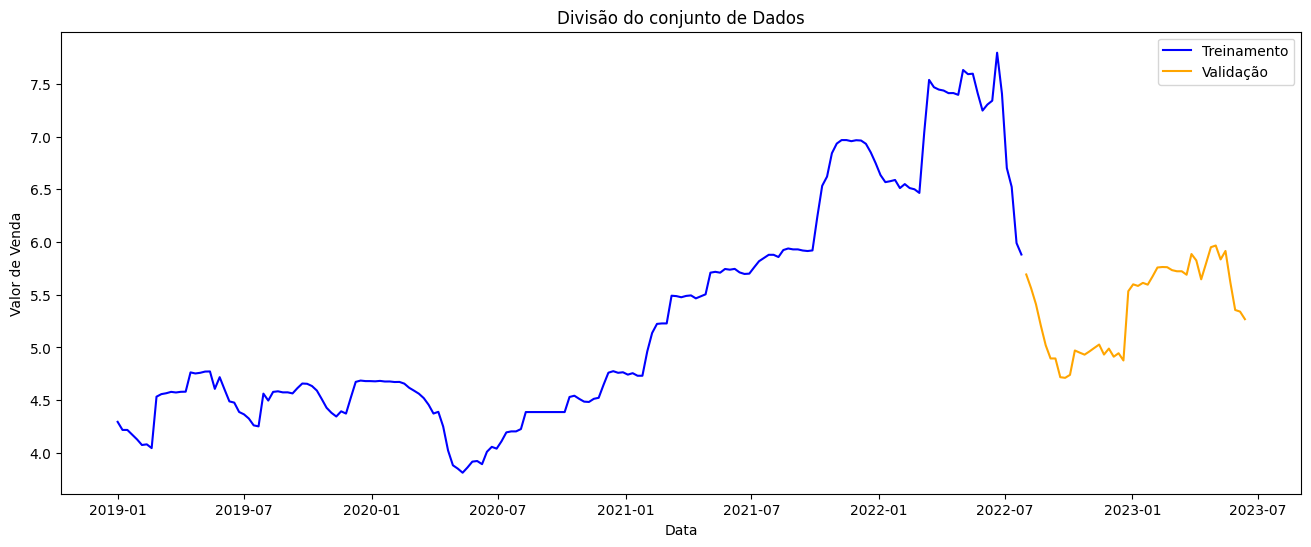

In [38]:
plt.figure(figsize=(16,6))

plt.title("Divisão do conjunto de Dados")

plt.plot(y_train,label='Treinamento', color='blue')
plt.plot(y_val,label='Validação', color='orange')

plt.xlabel("Data")
plt.ylabel("Valor de Venda")
plt.legend()

plt.show()

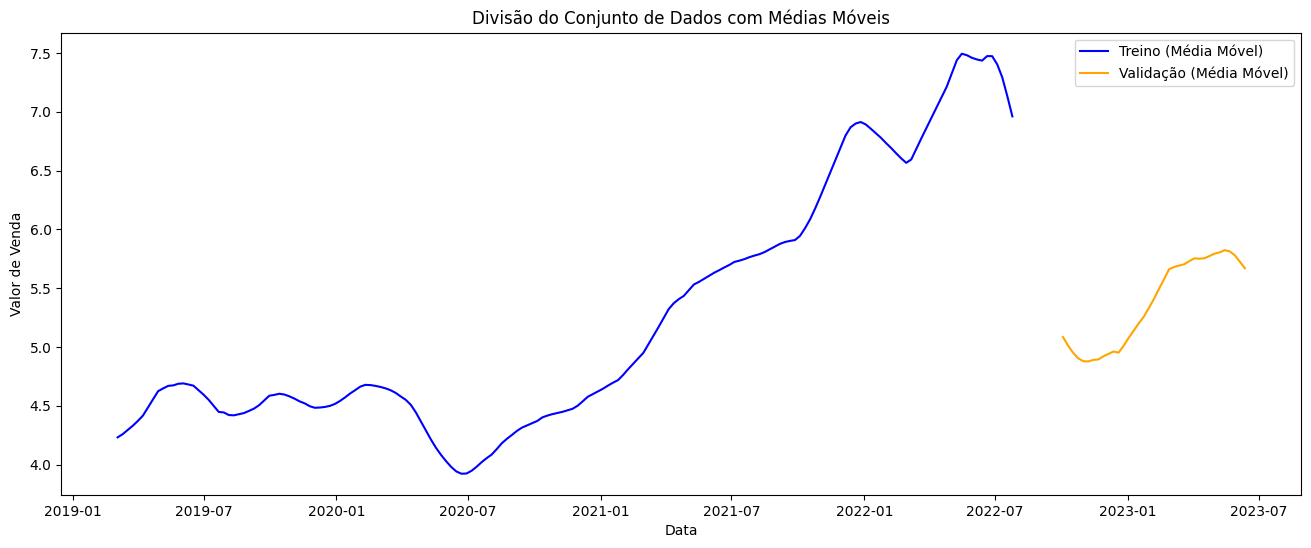

In [39]:
# Aplicando médias móveis com uma janela de 10 períodos (por exemplo)
y_train_rolling = y_train.rolling(window=10).mean()
y_val_rolling = y_val.rolling(window=10).mean()

# Plotando as médias móveis
plt.figure(figsize=(16, 6))

plt.title("Divisão do Conjunto de Dados com Médias Móveis")

plt.plot(y_train_rolling, label='Treino (Média Móvel)', color='blue')
plt.plot(y_val_rolling, label='Validação (Média Móvel)', color='orange')

plt.xlabel("Data")
plt.ylabel("Valor de Venda")
plt.legend()

plt.show()


# log linear e usar linear 
# depois pegar o residuo do modelo linear e usar na arvore de decisao

## Análise de Autocorrelação

<function matplotlib.pyplot.show(close=None, block=None)>

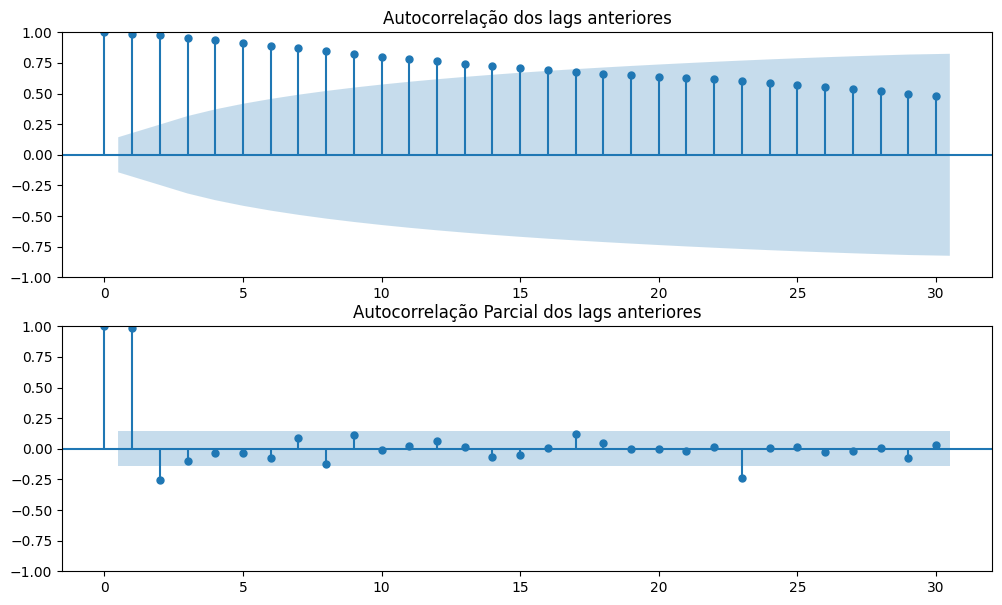

In [40]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(211)
fig = plot_acf(X_train['Valor de Venda'], lags=30, ax=ax1)
ax1.set_title("Autocorrelação dos lags anteriores")

ax2 = fig.add_subplot(212)
fig = plot_pacf(X_train['Valor de Venda'], lags=30, ax=ax2)
ax2.set_title("Autocorrelação Parcial dos lags anteriores")

plt.show


Lags Significantes: [1, 2, 6, 7, 8, 9, 17, 23, 28]


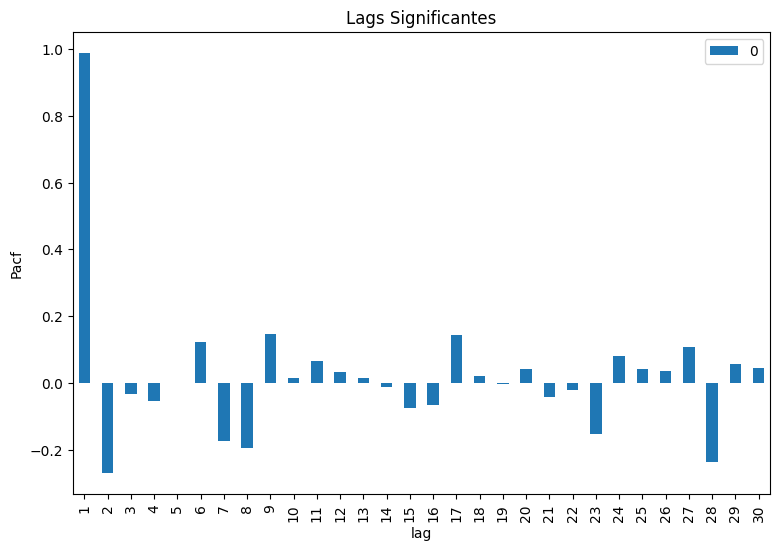

In [41]:
from statsmodels.tsa.stattools import pacf

def getSignificantLags(y, nLags = 5, alpha=0.05):
    Pacf, Pacf_intervalos =  pacf(x=y, nlags=nLags, alpha=alpha)
    pd.DataFrame(Pacf)[1:].plot(kind='bar', figsize=(9,6), legend='pacf valores',
                               xlabel='lag', ylabel='Pacf');
    significantLags = []
    for i in range(1, len(Pacf)):
        # print(pac[i], pac_ci[i][0], pac_ci[i][1])
        if Pacf[i] < Pacf_intervalos[i][0] - Pacf[i] or Pacf[i] > Pacf_intervalos[i][1] - Pacf[i]:
            significantLags.append(i)
    print('Lags Significantes:', significantLags)
    return significantLags

DT_significantLags = getSignificantLags(dados['Valor de Venda'], nLags = 30, alpha=0.05)
plt.title("Lags Significantes")
plt.show()

## Modelagem

In [42]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
def TheilU(y_true, y_pred):
    fResiduals2 = y_true[1:].subtract(y_pred[1:])
    fResiduals2 = fResiduals2.multiply(fResiduals2)
    rwForecasts = y_true.shift(1)
    rwResiduals2 = y_true[1:].subtract(rwForecasts[1:])
    rwResiduals2 = rwResiduals2.multiply(rwResiduals2)
    theil = fResiduals2.sum()/rwResiduals2.sum()
    return theil

models_label_r = []
df_teste  = pd.DataFrame()
def ResidualForModels(models,y_pred): 
    for model in models:
        formalism = type(model).__name__
        models_label_r.append(formalism)
        y_pred_t = y_pred
        df_teste[formalism] = y_pred_t
    return df_teste

models_label = []
models_MAPE = []
models_MAE = []
models_R2 = []
models_theil = []

def computeAccuracyModels(models,y_pred): 
    for model in models:
        formalism = type(model).__name__
        models_label.append(formalism)
        y_pred_test = y_pred
        models_MAE.append(mean_absolute_error(y_true=y_val.values.ravel(), y_pred=y_pred_test))
        # models_theil.append(TheilU(y_true=y_val.values.ravel(), y_pred=y_pred_test))
        models_MAPE.append(mean_absolute_percentage_error(y_true=y_val.values.ravel(), y_pred=y_pred_test))
        models_R2.append(r2_score(y_true=y_val.values.ravel(), y_pred=y_pred_test))
        
    df = pd.DataFrame({'model': models_label, 
                       'MAE': models_MAE,
                       'MAPE': models_MAPE,
                       'R2': models_R2,
                       # 'theil': models_theil
                       })
    print(" --------------------------- Medidas de Erro para os Modelos  --------------------------- ") 
    print(df.sort_values(by='MAE', ascending = True))
    

In [43]:
def appendLagVariables(y, significantLags, df, dropna=True, previousData=None):
    prefix = y.replace(')', '')
    df = df.copy()  # Fazendo uma cópia para evitar modificar o original
    lowerIndex = 0
    x = df[y]
    
    if previousData is not None:
        x = pd.concat([previousData[y], x])
        lowerIndex = previousData.shape[0]
    
    for lag in significantLags:
        varNm = prefix + '-' + str(lag) + ')'
        df[varNm] = x.shift(lag)[lowerIndex:]
    
    if dropna:
        # Dropar apenas linhas onde os NaN estão nas colunas de lag, preservando a coluna 'Valor de Venda'
        lag_columns = [prefix + '-' + str(lag) + ')' for lag in significantLags]
        df.dropna(subset=lag_columns, inplace=True)
        
    return df

# Usar a função para gerar as variáveis de lag e atribuir ao DataFrame X_train_transformed_df
X_train_transformed_df = appendLagVariables(
    y='Valor de Venda', 
    significantLags=DT_significantLags, 
    df=X_train_transformed_df, 
    dropna=True
)

X_val_transformed_df = appendLagVariables(
    y='Valor de Venda', 
    significantLags=DT_significantLags, 
    df=X_val_transformed_df, 
    dropna=True
)

X_test_transformed_df = appendLagVariables(
    y='Valor de Venda', 
    significantLags=DT_significantLags, 
    df=X_test_transformed_df, 
    dropna=True
)

X_val = appendLagVariables(
    y='Valor de Venda', 
    significantLags=DT_significantLags, 
    df=X_val, 
    dropna=True
)

y_train = X_train_transformed_df['Valor de Venda']
y_val = X_val_transformed_df['Valor de Venda']
y_test = X_test_transformed_df['Valor de Venda']



X_val_transformed_df = X_val_transformed_df.drop(columns=['Valor de Venda'])
X_test_transformed_df = X_test_transformed_df.drop(columns=['Valor de Venda'])
X_train_transformed_df = X_train_transformed_df.drop(columns=['Valor de Venda'])


In [44]:
print("Tamanho do dados após o pipeline\n")
print("Treinamento:", len(X_train_transformed_df))
print("Validação:", len(X_val_transformed_df))

Tamanho do dados após o pipeline

Treinamento: 159
Validação: 18


* trabalhar somente com fortaleza
* usar arvore de decisao para modelar residuos de outros modelos

In [45]:
X_val_transformed_df.head(5)

,Municipio_FORTALEZA,Ano,Mes,Valor de Venda-1),Valor de Venda-2),Valor de Venda-6),Valor de Venda-7),Valor de Venda-8),Valor de Venda-9),Valor de Venda-17),Valor de Venda-23),Valor de Venda-28)
Data da Coleta,,,,,,,,,,,,
2023-02-13,1.0,2023.0,2.0,5.758276,5.673922,5.598387,5.533400,4.875957,4.944615,4.950375,4.895051,5.692043
2023-02-20,1.0,2023.0,2.0,5.762857,5.758276,5.583404,5.598387,5.533400,4.875957,4.931143,4.895051,5.561061
2023-02-27,1.0,2023.0,2.0,5.761250,5.762857,5.612500,5.583404,5.598387,5.533400,4.961628,4.717333,5.409065
2023-03-06,1.0,2023.0,3.0,5.733220,5.761250,5.595345,5.612500,5.583404,5.598387,4.994857,4.711132,5.206753
2023-03-13,1.0,2023.0,3.0,5.722500,5.733220,5.673922,5.595345,5.612500,5.583404,5.027059,4.739231,5.020621


# Regression Linear Model

MSE (Mean Squared Error): 0.03203112407401114
 --------------------------- Medidas de Erro para os Modelos  --------------------------- 
              model       MAE      MAPE        R2
0  LinearRegression  0.148004  0.026137  0.189417


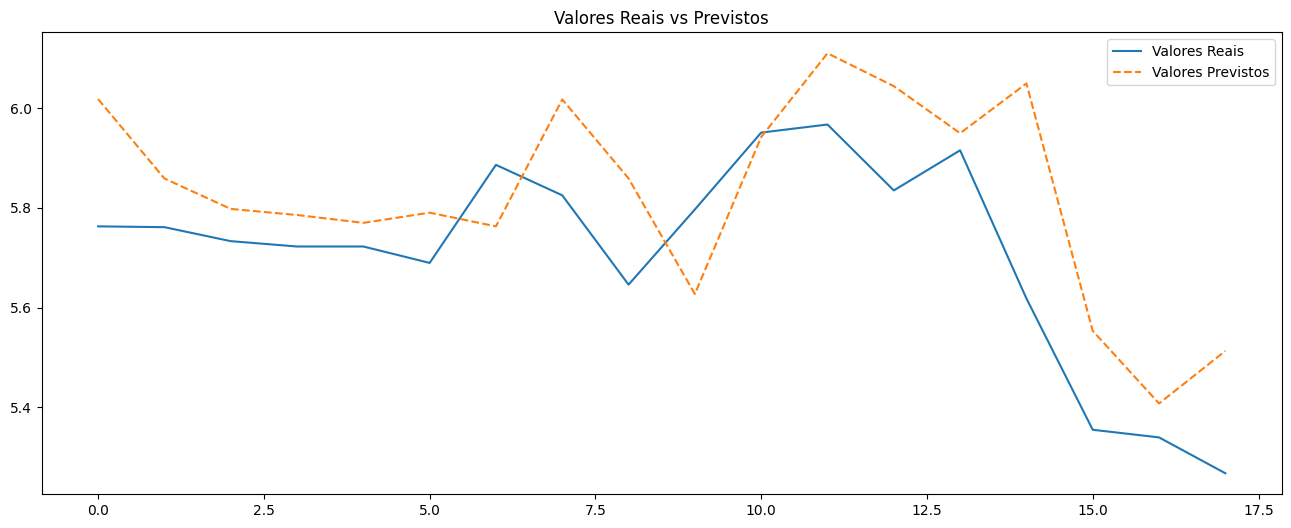

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


model = LinearRegression()
model.fit(X_train_transformed_df, y_train)


# Chamar a função para treinar o modelo LinearRegression

# Prever os valores usando o modelo treinado
y_pred_lr = model.predict(X_val_transformed_df)
y_val_series = y_val.values.ravel()  # Converter y_val para um array 1D

# Calcular o MSE (Mean Squared Error)
mse = mean_squared_error(y_val_series, y_pred_lr)
print(f"MSE (Mean Squared Error): {mse}")

# Exemplo de função para computar acurácia (assumindo que `computeAccuracyModels` está definida corretamente)
computeAccuracyModels(models=[model], y_pred=y_pred_lr)


# Opcional: Plotar os valores reais versus predições
plt.figure(figsize=(16, 6))
plt.plot(y_val_series, label='Valores Reais')
plt.plot(y_pred_lr, label='Valores Previstos', linestyle='--')
plt.legend()
plt.title("Valores Reais vs Previstos")
plt.show()


# Regression Linear Model with optimization

c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, False, 1, True] before, using random point [False, True, 8, False]
  warnings.warn(
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, False, 5, False] before, using random point [True, True, 3, True]
  warnings.warn(
c:\Users\kaio\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, False, 1, True] before, using random point [True, False, 8, True]
  warnings.warn(


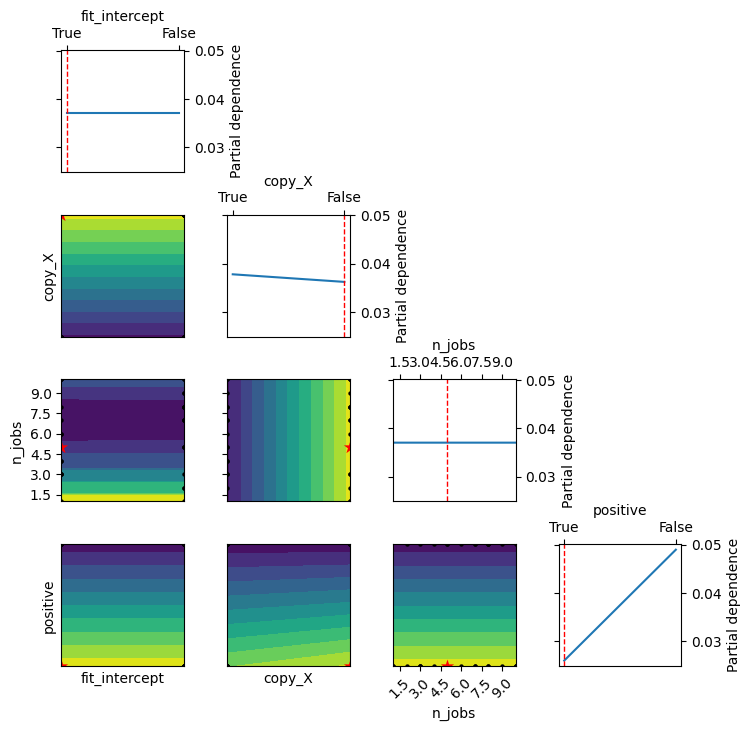

best_params =  OrderedDict([('copy_X', True), ('fit_intercept', False), ('n_jobs', 5), ('positive', True)])
best_score (RMSE)=  0.15650696417139565
MSE (Mean Squared Error): 0.01752697248168195
 --------------------------- Medidas de Erro para os Modelos  --------------------------- 
              model       MAE      MAPE        R2
1  LinearRegression  0.095990  0.016927  0.556460
0  LinearRegression  0.148004  0.026137  0.189417


In [47]:
from skopt import BayesSearchCV
from skopt.plots import plot_objective
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import numpy as np

# Definir a função para otimizar o modelo via BayesSearchCV
def getOptimalModelViaBayesSearchCv(modelObj, parsDists, x_train, y_train, verbose=False, 
                                    epochs=150, batch_size=32, validation_split=.2, callbacks=[]):
    opt = BayesSearchCV(
        estimator=modelObj,
        search_spaces=parsDists,
        n_iter=32,  # Número de iterações da otimização bayesiana
        cv=TimeSeriesSplit(n_splits=3),  # Validação cruzada com TimeSeriesSplit para séries temporais
        return_train_score=True,
        scoring='neg_mean_squared_error',  # Minimizar o erro quadrático médio
        verbose=verbose,
        n_jobs=-1  # Utilizar todos os núcleos disponíveis
    )

    # Ajustar o modelo com o BayesSearchCV
    opt.fit(X=x_train, y=y_train.values.ravel())
    
    # Plotar a busca pelos hiperparâmetros
    parNames = [name for name, value in parsDists.items()]
    _ = plot_objective(opt.optimizer_results_[0], dimensions=parNames, n_minimum_search=int(1e8))
    plt.show()
    
    # Exibir os melhores parâmetros e o melhor score (RMSE)
    print('best_params = ', opt.best_params_)
    print('best_score (RMSE)= ', np.sqrt(-opt.best_score_))
    
    # Melhor estimador
    model = opt.best_estimator_
    return model

# Definir o modelo e o espaço de parâmetros
model_lr = LinearRegression()

# Definir os intervalos dos hiperparâmetros para a otimização
param_dist = {
    'fit_intercept': [True, False], # Exemplo de hiperparâmetro booleano
    # 'copy_X': [True, False],
    # 'n_jobs':(1,10),
    'positive': [True, False]
}
# Chamar a função para otimização bayesiana
best_model = getOptimalModelViaBayesSearchCv(
    modelObj=model_lr,
    parsDists=param_dist,
    x_train=X_train_transformed_df,
    y_train=y_train
)

# Prever usando o melhor modelo encontrado
y_pred_lr = best_model.predict(X_val_transformed_df)
y_val_series = y_val.values.ravel()  # Converter y_val para um array 1D

# Calcular o MSE (Mean Squared Error)
mse = mean_squared_error(y_val_series, y_pred_lr)
print(f"MSE (Mean Squared Error): {mse}")

# Função computeAccuracyModels assumindo que está definida corretamente
computeAccuracyModels(models=[best_model], y_pred=y_pred_lr)



In [48]:
df_previsoes = pd.DataFrame({
    'Valor Real': y_val_series,
    'Valor Previsto_LR': y_pred_lr
}, index=y_val.index)

# Supondo que 'Municipio' esteja em X_val
# Adicionando a coluna 'Municipio' ao DataFrame df_comparacao
df_previsoes['Municipio'] = X_val['Municipio']

df_residuos = pd.DataFrame()
df_residuos['resid_LR'] = df_previsoes['Valor Real'].subtract(df_previsoes['Valor Previsto_LR'])
df_residuos['Municipio'] = X_val['Municipio']



In [49]:
display(df_previsoes.head(5))

,Valor Real,Valor Previsto_LR,Municipio
Data da Coleta,,,
2023-02-13,5.762857,5.760930,FORTALEZA
2023-02-20,5.761250,5.765470,FORTALEZA
2023-02-27,5.733220,5.763877,FORTALEZA
2023-03-06,5.722500,5.736930,FORTALEZA
2023-03-13,5.722500,5.726306,FORTALEZA


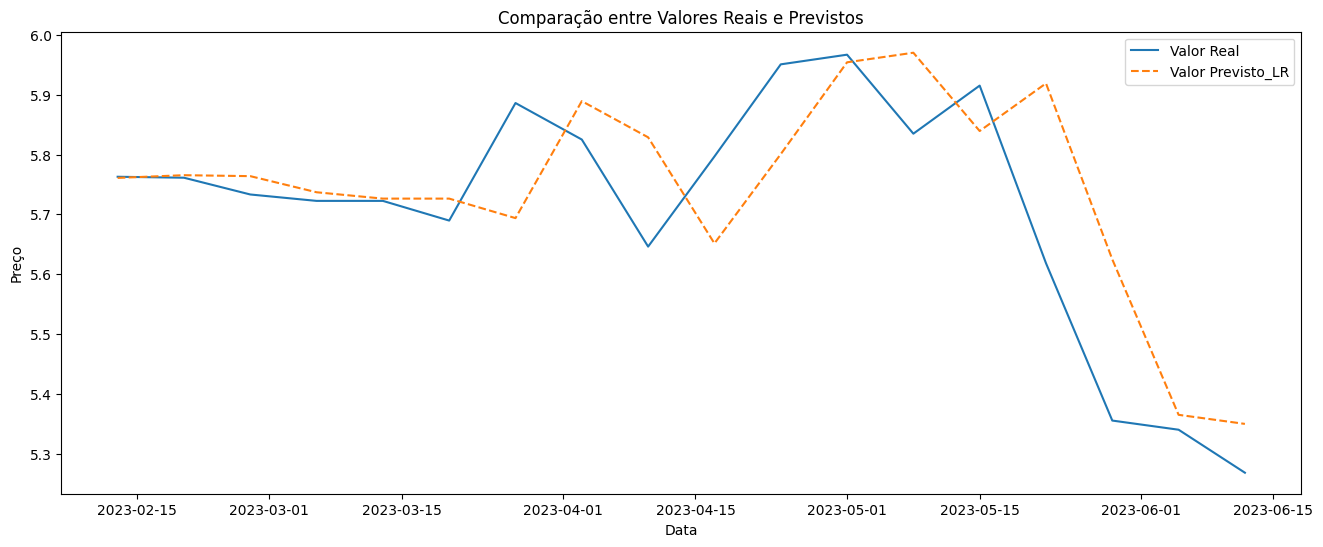

In [50]:
# Plotando os resultados
plt.figure(figsize=(16, 6))
plt.plot(df_previsoes['Valor Real'], label='Valor Real')
plt.plot(df_previsoes['Valor Previsto_LR'], label='Valor Previsto_LR', linestyle='--')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()